In [43]:
#import Libraries
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
%matplotlib inline

In [44]:
# Example: Loading the full MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
data = mnist.data

In [46]:
# viewing the dataset
data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
print(data.shape)  # To see the overall structure
print(data.head())  # To inspect the first few rows


(70000, 784)
   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0        0  ...         0         0         0         0         0         0   
1        0  ...         0         0         0         0         0         0   
2        0  ...         0         0         0         0         0         0   
3        0  ...         0         0         0         0         0         0   
4        0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0    

In [48]:
print(data.columns)


Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=784)


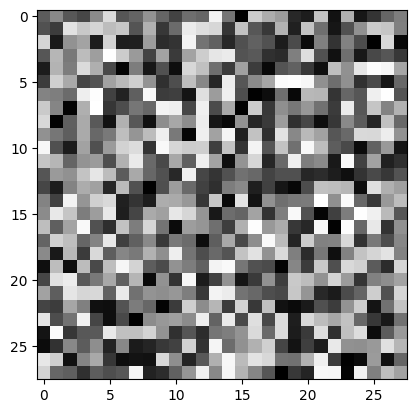

In [51]:

a = np.random.randint(0, 256, size=(784,)) 
a = a.reshape(28, 28).astype('uint8')

# Display the image
plt.imshow(a, cmap='gray')
plt.show()


In [53]:
# Features are pixel values
X = mnist.data

# Target variable is the digit label
y = mnist.target

# Print the shapes of the datasets
print("X shape:", X.shape)  
print("y shape:", y.shape)  

X shape: (70000, 784)
y shape: (70000,)


In [54]:
# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
47339,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67456,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12308,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
664,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
y_train.head()

47339    5
67456    4
12308    8
32557    0
664      2
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [59]:
#performing random forest classifier
rf=RandomForestClassifier(n_estimators = 100)
rf.fit(X_train,y_train)

RandomForestClassifier()

In [60]:
#prediction using random forest classifier
pr = rf.predict(X_test)

In [61]:
pr

array(['8', '4', '8', ..., '2', '7', '1'], dtype=object)

In [63]:
#check prediction accuracy
s = y_test.values

#calculate number of correctly predicted values
count = 0
for i in range(len(pr)):
    if pr[i]== s[i]:
       count = count + 1

In [64]:
count

13534

In [65]:
# total values for prediction
len(pr)

14000

In [72]:
#accuracy value
acc = count/len(pr)
acc = acc*100
print("the accuracy of random forest classifier is",acc)

the accuracy of random forest classifier is 96.67142857142858
